In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import bloscpack as bp
import sys
import os

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

%matplotlib inline

No vtk


In [3]:
stack_moving = 'MD594'
stack_fixed = 'MD589'

In [4]:
atlas_name = 'atlasV3'

In [5]:
from data_manager import *

In [6]:
volume_fixed = DataManager.load_annotation_volume(stack=stack_fixed, downscale=32)
volume_moving = DataManager.load_annotation_volume(stack=stack_moving, downscale=32)

print volume_fixed.shape
print volume_moving.shape

(348, 421, 377)
(326, 515, 368)


In [7]:
label_to_name_m, name_to_label_m = DataManager.load_volume_label_to_name(stack_moving)
label_to_name_f, name_to_label_f = DataManager.load_volume_label_to_name(stack_fixed)

In [8]:
colors = {name_u: np.random.randint(0,255,3)/255.
          for name_u in set([convert_name_to_unsided(name_s) for name_s in name_to_label_m.keys()])}

# Generate transformed annotation volume meshes

Untransformed annotation volume meshes are generated in `visualize_annotationVolume2`

In [7]:
volume_m_alignedTo_f = DataManager.load_transformed_volume(stack_m=stack_moving, type_m='annotation',
                                                                             stack_f=stack_fixed, type_f='annotation',
                                                                             downscale=32,
                                                          global_transform_scheme=1)

In [8]:
vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax = DataManager.load_volume_bbox(stack_fixed, type='annotation', downscale=32)
print vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax

622 1042 155 502 127 503


In [9]:
for name_s, label in name_to_label_m.iteritems():
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(volume_m_alignedTo_f == label)
    vol = (volume_m_alignedTo_f[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] == label).astype(np.float)

    t = time.time()
    polydata = volume_to_polydata(vol, origin=(vol_f_xmin+xmin, vol_f_ymin+ymin, vol_f_zmin+zmin), 
                                  num_simplify_iter=3, smooth=True)
    sys.stderr.write('time: %.2f\n' % (time.time() - t) )
    
    polydata_fn = DataManager.get_transformed_volume_mesh_filepath(stack_m=stack_moving, type_m='annotation',
                                                stack_f=stack_fixed, type_f='annotation',
                                                 downscale=32, label=name_s, global_transform_scheme=1)    
    save_mesh(polydata, polydata_fn)

marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13059: 0.14 seconds
simplify 1 @ 2613: 0.12 seconds
simplify 2 @ 524: 0.02 seconds
time: 0.34
marching cube: 0.12 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31672: 0.32 seconds
simplify 1 @ 6336: 0.30 seconds
simplify 2 @ 1268: 0.06 seconds
time: 0.84
marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 16962: 0.15 seconds
simplify 1 @ 3394: 0.13 seconds
simplify 2 @ 680: 0.03 seconds
time: 0.43
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10689: 0.09 seconds
simplify 1 @ 2139: 0.08 seconds
simplify 2 @ 429: 0.02 seconds
time: 0.23
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2520: 0.02 seconds
simplify 1 @ 505: 0.02 seconds
time: 0.06
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10094: 0.10 seconds
simplify 1 @ 2020: 0.08 seconds
simplify 2 @ 405: 0.02 seconds
time: 0.29
marching cube: 0.04 seconds
mesh_to_

# Load annotation volume meshes

In [7]:
# Load moving volume aligned to fixed

moving_volume_alignedTo_fixed_volume_polydata_list = \
{name_s: DataManager.load_transformed_volume_mesh(stack_m=stack_moving, type_m='annotation',
                                                stack_f=stack_fixed, type_f='annotation',
                                                downscale=32, label=name_s, global_transform_scheme=1)
 for name_s in name_to_label_m.iterkeys()}

In [8]:
# Load moving volume

moving_volume_polydata_list = \
{name_s: DataManager.load_annotation_volume_mesh(stack=stack_moving, downscale=32, label=name_s)
 for name_s in name_to_label_m.iterkeys()}

In [9]:
# Load fixed volume

fixed_volume_polydata_list = \
{name_s: DataManager.load_annotation_volume_mesh(stack=stack_fixed, downscale=32, label=name_s)
 for name_s in name_to_label_f.iterkeys()}

In [10]:
# # Show each structure in one color

# volume_m_alignedTo_f_mesh_actors = [actor_mesh(polydata, colors[convert_name_to_unsided(name_s)], wireframe=True, opacity=1.) 
#                for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()]

# volume_f_mesh_actors = [actor_mesh(polydata, colors[convert_name_to_unsided(name_s)], wireframe=True, opacity=1.) 
#                for name_s, polydata in fixed_volume_polydata_list.iteritems()]

# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors)

In [50]:
# # Show each brain in one color

# volume_m_alignedTo_f_mesh_actors = [actor_mesh(polydata, (1,0,1), wireframe=False, opacity=.5) 
#                for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()]

# volume_f_mesh_actors = [actor_mesh(polydata, (0,0,1), wireframe=True, opacity=.5, 
#                                    origin=(0,0,0)) 
#                for name_s, polydata in fixed_volume_polydata_list.iteritems()]

# volume_m_mesh_actors = [actor_mesh(polydata, (0,1,1), wireframe=True, opacity=.5,
#                                   origin=(0,0,0)) 
#                for name_s, polydata in moving_volume_polydata_list.iteritems()]

In [ ]:
# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors + volume_m_mesh_actors)

In [71]:
# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors)

In [66]:
# launch_vtk(volume_f_mesh_actors + volume_m_mesh_actors, init_angle='30')

In [13]:
launch_vtk(
        [actor_mesh(polydata, (0,0,1), wireframe=True, opacity=1) 
             for name_s, polydata in fixed_volume_polydata_list.iteritems()] + \
           
           [actor_mesh(polydata, (0,1,0), wireframe=True, opacity=1)
               for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()],
           
#           [actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255., origin=canonical_centroid) 
#                     for n, polydata in atlas_space_structure_meshes.iteritems()])
#            [actor_mesh(polydata, color=(1,1,1), wireframe=True, origin=canonical_centroid) 
#                     for n, polydata in atlas_space_structure_meshes.iteritems()] + \
#             [actor_mesh(shell_polydata, opacity=.2)],
          init_angle='horizontal_topDown')

# Generate atlas (average shapes at average positions)

In [13]:
all_names = set([convert_name_to_unsided(name_s) for name_s in name_to_label_f.keys()])

In [14]:
centroid_allLandmarks = defaultdict(list)
polydata_list_allLandmarks = {}
average_polydata_allLandmarks = {}
average_volume_allLandmarks = {}
average_volume_origin_allLandmarks = {}

In [15]:
for name_u in all_names:

    print name_u
    
    vertices_list = []
    faces_list = []
    
    if name_u in singular_structures:
        
        vertices, faces = DataManager.load_annotation_volume_mesh(stack=stack_fixed, downscale=32, 
                                                                  label=name_u, return_polydata_only=False)
        

        vertices_mirrored = vertices.copy()
        zmean = vertices[:,2].mean(axis=0)
        vertices_mirrored[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin        

        vertices_list.append(vertices)
        faces_list.append(faces)

        vertices_list.append(vertices_mirrored)
        faces_list.append(faces)
        
        centroid = vertices.mean(axis=0)
        centroid_allLandmarks[name_u].append(centroid)
        
    
    else:
    
        lname = convert_to_left_name(name_u)
        rname = convert_to_right_name(name_u)

        if lname in name_to_label_f:

            ############## Left #############

            vertices, faces = DataManager.load_annotation_volume_mesh(stack=stack_fixed, downscale=32, 
                                                                  label=lname, return_polydata_only=False)

            zmean = vertices[:,2].mean(axis=0)
            vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

            vertices_list.append(vertices)
            faces_list.append(faces)

            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[lname].append(centroid)

        if rname in name_to_label_f:

            ################# Right ############## 
            # Right shape is used as the template
            #####################################

            vertices, faces = DataManager.load_annotation_volume_mesh(stack=stack_fixed, downscale=32, 
                                                            label=rname, return_polydata_only=False)

            vertices_list.append(vertices)
            faces_list.append(faces)

            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[rname].append(centroid)


        if lname in name_to_label_m:
            
            vertices, faces = DataManager.load_transformed_volume_mesh(stack_m=stack_moving, type_m='annotation',
                                                                       stack_f=stack_fixed, type_f='annotation',
                                                                       downscale=32, label=lname, 
                                                                       global_transform_scheme=1,
                                                                       return_polydata_only=False)

            zmean = vertices[:,2].mean(axis=0)
            vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

            vertices_list.append(vertices)
            faces_list.append(faces)


            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[lname].append(centroid)

        if rname in name_to_label_m:

            vertices, faces = DataManager.load_transformed_volume_mesh(stack_m=stack_moving, type_m='annotation',
                                                                       stack_f=stack_fixed, type_f='annotation',
                                                                       downscale=32, label=rname, 
                                                                       global_transform_scheme=1,
                                                                       return_polydata_only=False)

            vertices_list.append(vertices)
            faces_list.append(faces)

            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[rname].append(centroid)
        
        
    #############################
    
    vertices_aligned_list = [] # all meshes in this list have vertices mean at (0,0)

    for i, vertices in enumerate(vertices_list):

        if i == 0:
            vertices1 = vertices.copy()
            vertices_aligned_list.append(vertices1 - vertices1.mean(axis=0))
        else:            
            t = time.time()                    
            vertices_alignedTo1 = icp(fixed_pts=vertices1, moving_pts=vertices, num_iter=100, rotation_only=True)
            sys.stderr.write('icp: %.2f\n' % (time.time() - t))

            vertices_aligned_list.append(vertices_alignedTo1 - vertices_alignedTo1.mean(axis=0))

    ################################
    
    polydata_list = [mesh_to_polydata(vs, fs) for vs, fs in zip(vertices_aligned_list, faces_list)]
    
    polydata_list_allLandmarks[name_u] = polydata_list
        
    average_volume, average_volume_origin, average_polydata = average_shape(polydata_list, 
                                                                            consensus_percentage=.5,
                                                                            num_simplify_iter=3, smooth=True)
    # these all have vertices mean at (0,0,0)
    
    average_polydata_allLandmarks[name_u] = average_polydata
    average_volume_allLandmarks[name_u] = average_volume
    average_volume_origin_allLandmarks[name_u] = average_volume_origin
    
#     instance_actors = [actor_mesh(polydata, np.random.randint(0,255,3)/255., opacity=.5, wireframe=True) 
#                    for polydata in polydata_list_allLandmarks[name_u]]

#     average_mesh_actor = actor_mesh(average_polydata_allLandmarks[name_u], (1,1,1), opacity=.5, wireframe=True)
#     launch_vtk(instance_actors + [average_mesh_actor])
    
#     average_volume_actor = actor_volume(average_volume.astype(np.float32), 
#                                         what='probability', origin=average_volume_origin)
#     launch_vtk(instance_actors + [average_volume_actor])

Tz


icp: 3.84
icp: 5.03
icp: 4.09
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 4529: 0.08 seconds
simplify 1 @ 907: 0.06 seconds
volume_to_polydata: 0.20


VCA


icp: 14.19
icp: 13.47
icp: 12.23
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11962: 0.10 seconds
simplify 1 @ 2394: 0.10 seconds
simplify 2 @ 480: 0.02 seconds
volume_to_polydata: 0.28


7n


icp: 8.01
icp: 11.45
icp: 11.37
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
find common: 0.02
marching cube: 0.10 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8992: 0.07 seconds
simplify 1 @ 1800: 0.08 seconds
simplify 2 @ 361: 0.02 seconds
volume_to_polydata: 0.29


DC


icp: 13.17
icp: 9.56
icp: 13.14
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.00
find common: 0.01
marching cube: 0.07 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12565: 0.13 seconds
simplify 1 @ 2515: 0.13 seconds
simplify 2 @ 508: 0.03 seconds
volume_to_polydata: 0.39


5N


icp: 6.40
icp: 5.62
icp: 5.78
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6485: 0.06 seconds
simplify 1 @ 1298: 0.06 seconds
simplify 2 @ 261: 0.01 seconds
volume_to_polydata: 0.17


3N


icp: 0.99
icp: 1.25
icp: 1.98
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2146: 0.04 seconds
simplify 1 @ 430: 0.03 seconds
volume_to_polydata: 0.09


Pn


icp: 16.78
icp: 20.35
icp: 14.14
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.00
find common: 0.01
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 15697: 0.13 seconds
simplify 1 @ 3141: 0.12 seconds
simplify 2 @ 629: 0.03 seconds
volume_to_polydata: 0.36


10N


icp: 2.92
icp: 2.56
icp: 4.67
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.04 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3347: 0.05 seconds
simplify 1 @ 671: 0.04 seconds
volume_to_polydata: 0.15


VLL


icp: 12.34
icp: 13.49
icp: 10.36
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.00
find common: 0.02
marching cube: 0.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12027: 0.12 seconds
simplify 1 @ 2407: 0.11 seconds
simplify 2 @ 483: 0.02 seconds
volume_to_polydata: 0.39


7N


icp: 7.89
icp: 8.55
icp: 11.98
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10537: 0.10 seconds
simplify 1 @ 2109: 0.09 seconds
simplify 2 @ 423: 0.02 seconds
volume_to_polydata: 0.26


Amb


icp: 2.16
icp: 3.17
icp: 2.46
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 789: 0.01 seconds
volume_to_polydata: 0.02


12N


icp: 13.62
polydata_to_volume: 0.01
polydata_to_volume: 0.01
find common: 0.00
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 10422: 0.17 seconds
simplify 1 @ 2086: 0.15 seconds
simplify 2 @ 418: 0.03 seconds
volume_to_polydata: 0.44


RMC


icp: 4.70
icp: 3.36
icp: 4.34
polydata_to_volume: 0.00
polydata_to_volume: 0.01
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 5832: 0.10 seconds
simplify 1 @ 1168: 0.10 seconds
simplify 2 @ 235: 0.02 seconds
volume_to_polydata: 0.28


Sp5O


icp: 11.94
icp: 6.29
icp: 8.77
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.01
marching cube: 0.08 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 11378: 0.22 seconds
simplify 1 @ 2277: 0.18 seconds
simplify 2 @ 457: 0.04 seconds
volume_to_polydata: 0.55


Sp5I


icp: 8.93
icp: 4.97
icp: 12.59
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.01
marching cube: 0.09 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9100: 0.13 seconds
simplify 1 @ 1821: 0.08 seconds
simplify 2 @ 365: 0.02 seconds
volume_to_polydata: 0.34


Sp5C


icp: 37.89
icp: 34.23
icp: 32.42
polydata_to_volume: 0.02
polydata_to_volume: 0.02
polydata_to_volume: 0.03
polydata_to_volume: 0.01
find common: 0.04
marching cube: 0.32 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 29337: 0.37 seconds
simplify 1 @ 5869: 0.31 seconds
simplify 2 @ 1175: 0.06 seconds
volume_to_polydata: 1.12


VCP


icp: 5.17
icp: 4.03
icp: 9.15
polydata_to_volume: 0.00
polydata_to_volume: 0.02
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.01
marching cube: 0.06 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7175: 0.12 seconds
simplify 1 @ 1437: 0.10 seconds
simplify 2 @ 288: 0.02 seconds
volume_to_polydata: 0.32


AP


icp: 1.59
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2309: 0.02 seconds
simplify 1 @ 463: 0.02 seconds
volume_to_polydata: 0.06


PBG


icp: 0.93
icp: 1.70
icp: 2.36
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2207: 0.03 seconds
simplify 1 @ 443: 0.03 seconds
volume_to_polydata: 0.09


LRt


icp: 9.75
icp: 7.86
icp: 14.74
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.01
find common: 0.01
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 10898: 0.09 seconds
simplify 1 @ 2181: 0.09 seconds
simplify 2 @ 437: 0.02 seconds
volume_to_polydata: 0.27


IC


icp: 106.45
polydata_to_volume: 0.07
polydata_to_volume: 0.07
find common: 0.05
marching cube: 0.47 seconds
mesh_to_polydata: 0.11 seconds
simplify 0 @ 59097: 0.78 seconds
simplify 1 @ 11821: 0.67 seconds
simplify 2 @ 2365: 0.13 seconds
volume_to_polydata: 2.17


LC


icp: 2.07
icp: 1.78
icp: 1.67
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3583: 0.04 seconds
simplify 1 @ 718: 0.03 seconds
volume_to_polydata: 0.09


4N


icp: 1.01
icp: 1.54
icp: 1.12
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 348: 0.00 seconds
volume_to_polydata: 0.01


SNC


icp: 5.33
icp: 5.62
icp: 7.93
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
polydata_to_volume: 0.01
find common: 0.01
marching cube: 0.08 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 7396: 0.10 seconds
simplify 1 @ 1480: 0.13 seconds
simplify 2 @ 297: 0.02 seconds
volume_to_polydata: 0.35


6N


icp: 2.84
icp: 0.91
icp: 2.27
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
polydata_to_volume: 0.00
find common: 0.00
marching cube: 0.00 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 694: 0.01 seconds
volume_to_polydata: 0.01


SNR


icp: 16.56
icp: 38.17
icp: 31.40
polydata_to_volume: 0.03
polydata_to_volume: 0.02
polydata_to_volume: 0.03
polydata_to_volume: 0.03
find common: 0.04
marching cube: 0.36 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 28199: 0.46 seconds
simplify 1 @ 5641: 0.52 seconds
simplify 2 @ 1129: 0.11 seconds
volume_to_polydata: 1.56


SC


icp: 186.97
polydata_to_volume: 0.10
polydata_to_volume: 0.10
find common: 0.09
marching cube: 0.74 seconds
mesh_to_polydata: 0.14 seconds
simplify 0 @ 97080: 0.93 seconds
simplify 1 @ 19417: 1.01 seconds
simplify 2 @ 3885: 0.19 seconds
volume_to_polydata: 3.04


RtTg


icp: 34.55
polydata_to_volume: 0.01
polydata_to_volume: 0.01
find common: 0.01
marching cube: 0.14 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20819: 0.22 seconds
simplify 1 @ 4162: 0.19 seconds
simplify 2 @ 834: 0.04 seconds
volume_to_polydata: 0.63


In [ ]:
# Take pics of different instances of 7N separately

for i, polydata in enumerate(polydata_list_allLandmarks['7N']):
    instance_actors = actor_mesh(polydata, [(1,0,0),(0,1,0),(0,0,1),(1,1,0)][i], opacity=1, wireframe=False)
    launch_vtk([instance_actors], snapshot_fn='/home/yuncong/7N_%d.png' % i, interactive=True, init_angle='coronal')

In [ ]:
# Take pic of different instances of 7N shown aligned together

instance_actors = [actor_mesh(polydata, [(1,0,0),(0,1,0),(0,0,1),(1,1,0)][i], opacity=.5, wireframe=True) 
                   for i, polydata in enumerate(polydata_list_allLandmarks['7N'])]
launch_vtk(instance_actors, snapshot_fn='/home/yuncong/7N_aligned.png', interactive=False, init_angle='coronal')

In [ ]:
# Take pic of merged probabilistic volume of 7N

average_volume_actor = actor_volume(average_volume_allLandmarks['7N'].astype(np.float32), 
                                        what='probability', origin=average_volume_origin_allLandmarks['7N'])
launch_vtk([average_volume_actor], snapshot_fn='/home/yuncong/7N_prob.png', interactive=False, init_angle='coronal')

In [ ]:
# Take pic of merged probabilistic volume of 7N, thresholded at .5

actor = actor_mesh(average_polydata_allLandmarks['7N'], [1,1,1], opacity=.5, wireframe=True)
launch_vtk([actor], snapshot_fn='/home/yuncong/7N_thresholded.png', interactive=False, init_angle='coronal')

In [16]:
canonical_locations, canonical_centroid, canonical_normal = average_location(centroid_allLandmarks)
# canonical locations are with respect to canonical centroid
# canonical centroid is with respect to the aligned uncropped volume of MD589

[ 0.03719807 -0.09707115  0.99458206] @ [ 796.70135498  373.97094727  308.76776123]


In [17]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.96693


In [18]:
atlas_space_structure_volumes = {}
atlas_space_structure_meshes = {}

for name_s in name_to_label_f.iterkeys():
    
    name_u = convert_name_to_unsided(name_s)
    
    average_volume = average_volume_allLandmarks[name_u]
    average_volume_origin = average_volume_origin_allLandmarks[name_u]
    average_polydata = average_polydata_allLandmarks[name_u]
    
    vs, fs = polydata_to_mesh(average_polydata)
    
    canonical_structure_centroid = canonical_locations[name_s]
    
    if name_s in singular_structures or '_R' in name_s:
        # singular or LEFT - don't need mirroring
    
        atlas_space_structure_volumes[name_s] = (average_volume, 
                                            canonical_structure_centroid + average_volume_origin)    
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vs + canonical_structure_centroid, fs)
        # mesh has "canonical centroid" as the origin

    else:
        # RIGHT - need mirroring
        
        atlas_space_structure_volumes[name_s] = mirror_volume(average_volume, 
                                             canonical_structure_centroid + average_volume_origin*(1,1,-1))
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vs*(1,1,-1) + canonical_structure_centroid, fs)

In [19]:
# Save atlas structure meshes

for name_s, mesh in atlas_space_structure_meshes.iteritems():
    save_mesh_stl(mesh, DataManager.get_mesh_filepath(stack=atlas_name, label=name_s))

In [20]:
# Save atlas structure volumes - individual structures

create_if_not_exists(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume'))

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    bp.pack_ndarray_file(volume, os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_%s.bp'%name_s))
    np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_origin_%s.txt'%name_s), origin)
                
write_dict_to_txt(canonical_locations, os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'))
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'), canonical_centroid)
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'), canonical_normal)

# Generate atlas score volumes - named atlasV2

In [23]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

structure_colors = {n: np.random.randint(0, 255, (3,)) for n in structures}

structures_sided = sum([[n] if n in singular_structures else [convert_to_left_name(n), convert_to_right_name(n)]
                        for n in structures], [])

In [24]:
ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax = \
DataManager.load_volume_bbox(stack=stack_fixed, type='annotation', downscale=32)

print 'annotation volume bbox :', ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax

annotation volume bbox : 622 1042 155 502 127 503


In [ ]:
prob_volume_structure_bboxes = {}
for name_s in structures_sided:    
    volume, origin = atlas_space_structure_volumes[name_s] 
    ydim, xdim, zdim = volume.shape
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin)).astype(np.int)
    prob_volume_structure_bboxes[name_s] = ( x, x+xdim-1, y, y+ydim-1, z, z+zdim-1)

In [79]:
bboxes = np.array([bbox for n, bbox in prob_volume_structure_bboxes.iteritems()])
prob_vol_xmin, prob_vol_ymin, prob_vol_zmin = np.min(bboxes[:, [0,2,4]], axis=0)
prob_vol_xmax, prob_vol_ymax, prob_vol_zmax = np.max(bboxes[:, [1,3,5]], axis=0)
print 'prob volume bbox:', prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax

prob_vol_xdim = prob_vol_xmax + 1 - prob_vol_xmin
prob_vol_ydim = prob_vol_ymax + 1 - prob_vol_ymin
prob_vol_zdim = prob_vol_zmax + 1 - prob_vol_zmin

prob volume bbox: -3 414 -3 340 -4 368


In [82]:
# Create an atlas proba. volume with all structures

atlas_prob_volume_allLandmarks = {}

for name_s in structures_sided:
        
    atlas_prob_volume = np.zeros((prob_vol_ydim, prob_vol_xdim, prob_vol_zdim), np.float16)

    volume, origin = atlas_space_structure_volumes[name_s] 
    ydim, xdim, zdim = volume.shape

    # Convert canonical locations to actual location
    # Being lazy here: the z axis should be orthogonal to the canonical normal, but here I assume z axis is the original
     
    # first line: wrt aligned uncropped MD589
    # second line: wrt annotation volume MD589
    # third line: wrt atlas volume
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin) - \
            (prob_vol_xmin, prob_vol_ymin, prob_vol_zmin)).astype(np.int)
    
    atlas_prob_volume[y:y+ydim, x:x+xdim, z:z+zdim] = volume
    
    atlas_prob_volume_allLandmarks[name_s] = atlas_prob_volume

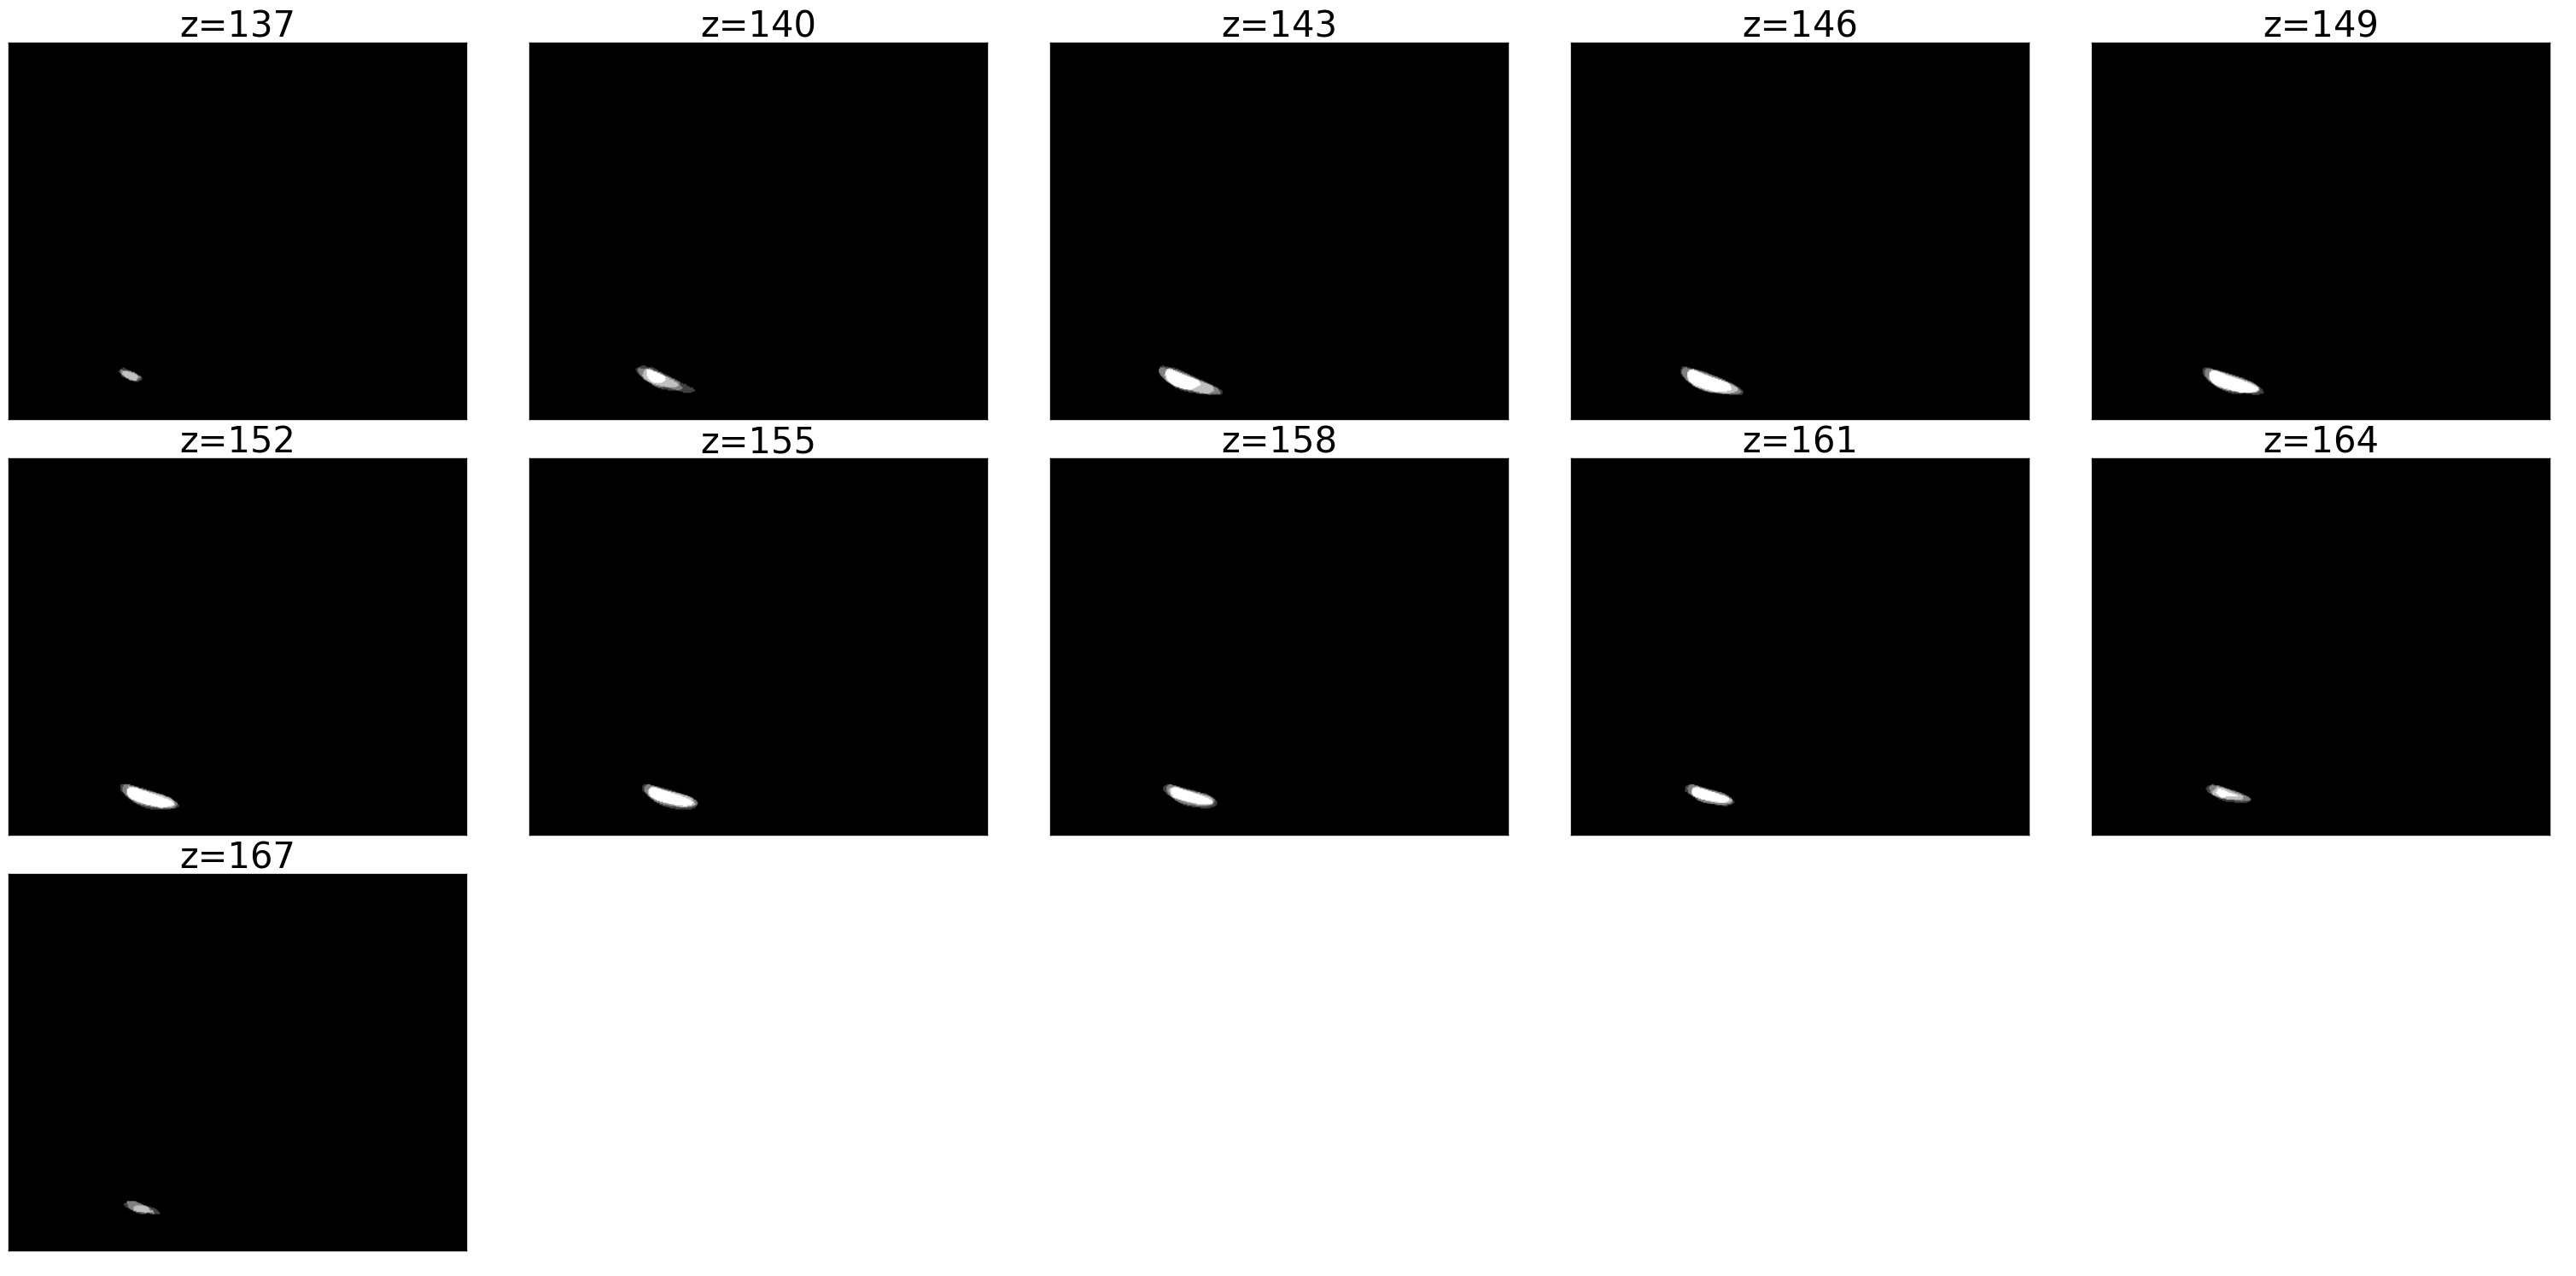

In [83]:
display_volume_sections(atlas_prob_volume_allLandmarks['Tz_L'], every=3)

In [84]:
# Save atlas score volume.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    vol_fn = DataManager.get_score_volume_filepath(stack=atlas_name, label=name_s, downscale=32)
    create_if_not_exists(os.path.dirname(vol_fn))
    bp.pack_ndarray_file(vol, vol_fn)

In [85]:
# Save atlas score volume bbox txt.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    fn = DataManager.get_score_volume_bbox_filepath(stack=atlas_name, label=name_s, downscale=32)
    np.savetxt(fn, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax], np.int)[None,:])
    # This is wrt MD589 annotation volume

In [86]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    
    surround_vol = get_surround_volume(vol, valid_level=.1, distance=15)
    
    vol_fn = DataManager.get_score_volume_filepath(stack=atlas_name, label=name_s+'_surround', downscale=32)
    
    create_if_not_exists(os.path.dirname(vol_fn))
    bp.pack_ndarray_file(surround_vol, vol_fn)

LRt_R
Sp5C_L
Pn_L
7N_R
PBG_L
VLL_L
4N_R
VLL_R
7N_L
PBG_R
RtTg
Sp5C_R
Pn_R
LRt_L
Sp5O_R
SNR_L
12N
SNR_R
Sp5O_L
DC_R
VCA_L
3N_L
6N_R
Sp5I_L
RMC_R
5N_L
SNC_L
SNC_R
AP
RMC_L
Sp5I_R
3N_R
6N_L
IC
VCA_R
DC_L
Amb_R
VCP_R
LC_R
10N_R
7n_R
5N_R
Tz_L
Tz_R
7n_L
4N_L
LC_L
10N_L
SC
VCP_L
Amb_L


In [87]:
# Save surround score volume bbox txt.

for n, vol in atlas_prob_volume_allLandmarks.iteritems():
    fn = DataManager.get_score_volume_bbox_filepath(stack=atlas_name, label=n + '_surround', downscale=32)
    np.savetxt(fn, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax], np.int)[None,:])
    # This is wrt MD589 annotation volume

In [88]:
# Convert surround volumes to meshes

for name_s in structures_sided:
        
    vol_fn = DataManager.get_score_volume_filepath(stack=atlas_name, label=name_s+'_surround', downscale=32)
    surround_vol = bp.unpack_ndarray_file(vol_fn)
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(surround_vol > 0)
    
    polydata = volume_to_polydata(surround_vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1], 
                                  origin=(xmin+prob_vol_xmin+ann_vol_xmin-canonical_centroid[0], 
                                       ymin+prob_vol_ymin+ann_vol_ymin-canonical_centroid[1], 
                                       zmin+prob_vol_zmin+ann_vol_zmin-canonical_centroid[2]), 
                       num_simplify_iter=3, smooth=True)
    # centered at "canonical centroid" - same as interior volumes
    
    mesh_fn = DataManager.get_mesh_filepath(stack=atlas_name, label=name_s+'_surround')
    save_mesh(polydata, mesh_fn)

marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30127: 0.27 seconds
simplify 1 @ 6028: 0.26 seconds
simplify 2 @ 1208: 0.05 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 30118: 0.26 seconds
simplify 1 @ 6026: 0.26 seconds
simplify 2 @ 1208: 0.09 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8527: 0.07 seconds
simplify 1 @ 1708: 0.06 seconds
simplify 2 @ 344: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8515: 0.07 seconds
simplify 1 @ 1706: 0.06 seconds
simplify 2 @ 344: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39329: 0.37 seconds
simplify 1 @ 7869: 0.38 seconds
simplify 2 @ 1577: 0.08 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39362: 0.37 seconds
simplify 1 @ 7875: 0.37 seconds
simplify 2 @ 1578: 0.07 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 

In [356]:
# surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['Pn_L'], distance=15, valid_level=0.1)
# display_volume_sections(surround_vol)

# Load and display meshes

In [25]:
# Load canonical info

canonical_locations = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'))
canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [26]:
# Load atlas meshes

atlas_space_structure_meshes = {name_s: DataManager.load_mesh(stack=atlas_name, label=name_s)
                                for name_s in structures_sided}

In [27]:
# Load atlas structure surround meshes

atlas_space_structure_surround_meshes = {
    name_s: DataManager.load_mesh(stack=atlas_name, label=name_s + '_surround', return_polydata_only=True)
    for name_s in structures_sided}

In [30]:
# Load structure prob volumes

atlas_space_structure_volumes = {}
for name_s in structures_sided:    
    volume = bp.unpack_ndarray_file(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_%s.bp'%name_s))
    origin = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_origin_%s.txt'%name_s))
    atlas_space_structure_volumes[name_s] = (volume, origin)

In [28]:
# Load shell
shell_polydata = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)

In [35]:
# Create actors

all_atlas_structure_mesh_actors = [actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255.,
                                             wireframe=True) 
                                   for n, polydata in atlas_space_structure_meshes.iteritems()]

all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(1,1,1),
                                                      wireframe=True) 
                                            for n, polydata in atlas_space_structure_surround_meshes.iteritems()]

all_atlas_structure_volume_actors = []

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    name_u = convert_name_to_unsided(name_s)
    structure_volume_actor = actor_volume(volume.astype(np.float32), what='probability', origin=origin, c=colors[name_u])
    all_atlas_structure_volume_actors.append(structure_volume_actor)
    
    
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False, origin=-canonical_centroid)

In [33]:
launch_vtk([actor_mesh(atlas_space_structure_meshes['SNR_L'], color=(1,1,1), wireframe=True),
            actor_mesh(atlas_space_structure_surround_meshes['SNR_L'], color=(0,1,1), wireframe=True)])

In [36]:
launch_vtk(all_atlas_structure_mesh_actors)

In [32]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_surround_mesh_actors)

In [72]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_volume_actors, init_angle='sagittal')

In [38]:
launch_vtk([actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255.) 
            for n, polydata in atlas_space_structure_meshes.iteritems()] + \
           [shell_actor], init_angle='30')

In [32]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='sagittal')

In [33]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown')

In [31]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown', animate=False,
          interactive=False, snapshot_fn='/home/yuncong/snapshot_horizontal.png', snapshot_magnification=10)

In [30]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='sagittal', animate=False, 
           interactive=False, snapshot_fn='/home/yuncong/snapshot_sagittal.png', snapshot_magnification=10)

In [38]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal', animate=True)

In [74]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal')

In [39]:
launch_vtk(all_atlas_structure_volume_actors , init_angle='sagittal')